In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Colab-TimeSeriesBasics/quebec_real_estate.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head(10)

,Province_Median_Price,Province_Average_Time,Montreal_Median_Price,Montreal_Average_Time
Date,,,,
2014-01-01,210000,135,220000,124
2014-02-01,212000,128,225000,117
2014-03-01,210000,130,225000,118
2014-04-01,214000,120,225000,113
2014-05-01,215000,125,226287,115
2014-06-01,220000,129,234525,122
2014-07-01,223000,130,235000,128
2014-08-01,214000,139,230150,128
2014-09-01,220000,134,234000,121


<Axes: xlabel='Date'>

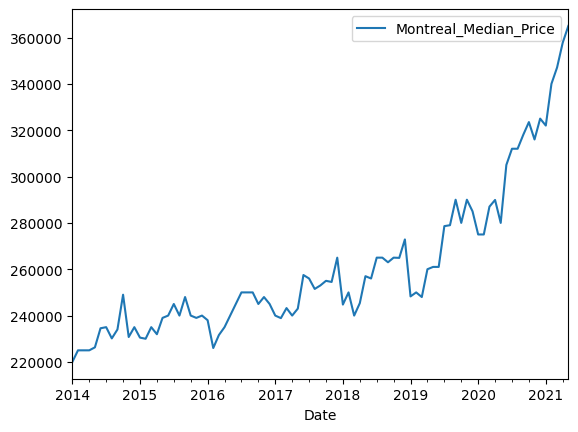

In [2]:
data = df[['Montreal_Median_Price']].copy()
data.dropna(inplace=True)
data.plot()

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

perform_adf_test(data)

ADF Statistic: 3.414756
p-value: 1.000000


In [4]:
def generate_ar_process(lags, coefs, length):

    #cast coefs to np array
    coefs = np.array(coefs)

    #initial values
    series = [np.random.normal() for _ in range(lags)]

    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]

        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()

        series.append(new_val)

    return np.array(series)

Text(0.5, 1.0, 'Stationary AR(1) Process')

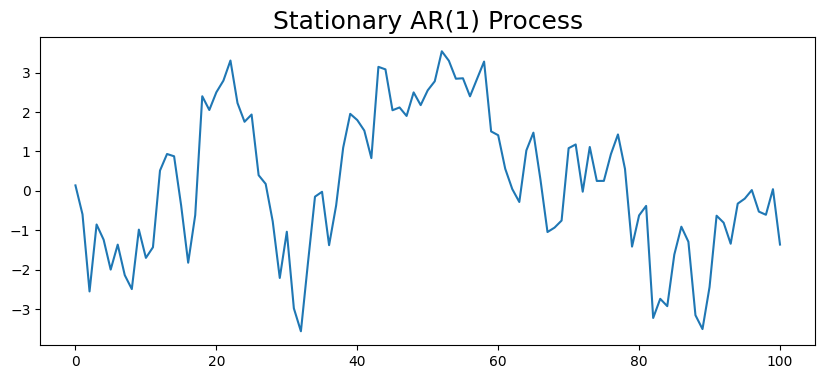

In [23]:
ar_1_process = generate_ar_process(1, [0.8], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [24]:
perform_adf_test(ar_1_process)

ADF Statistic: -2.351292
p-value: 0.155958


Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

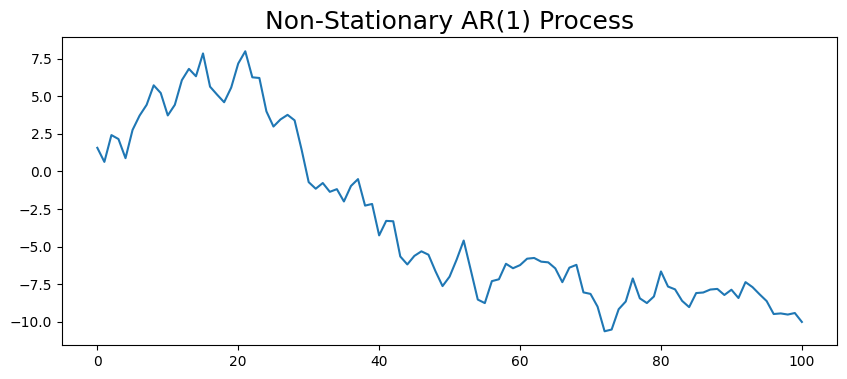

In [25]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [26]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -0.326320
p-value: 0.921693


Text(0.5, 1.0, 'Stationary AR(2) Process')

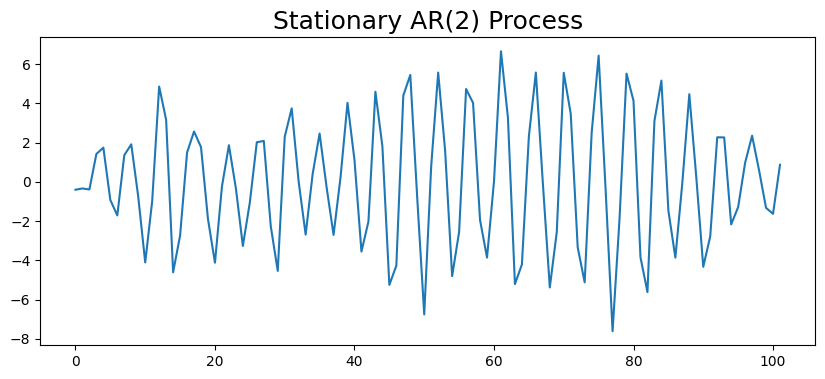

In [33]:
ar_2_process = generate_ar_process(2, [.3, -.9], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [34]:
perform_adf_test(ar_2_process)

ADF Statistic: -38.513745
p-value: 0.000000


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


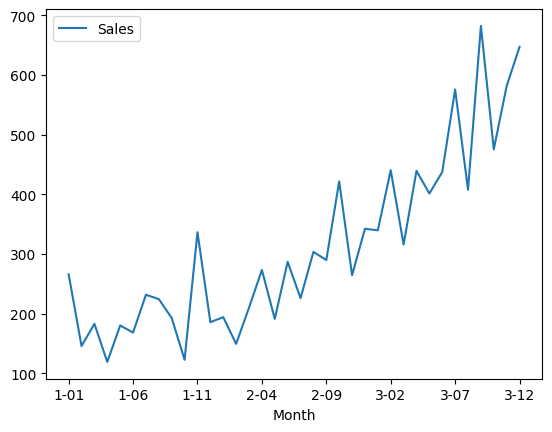

In [ ]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Colab-TimeSeriesBasics/shampoo_sales.csv')
df.set_index('Month', inplace=True)
df.plot()
df.head()

In [ ]:
perform_adf_test(df)

ADF Statistic: 3.060142
p-value: 1.000000


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


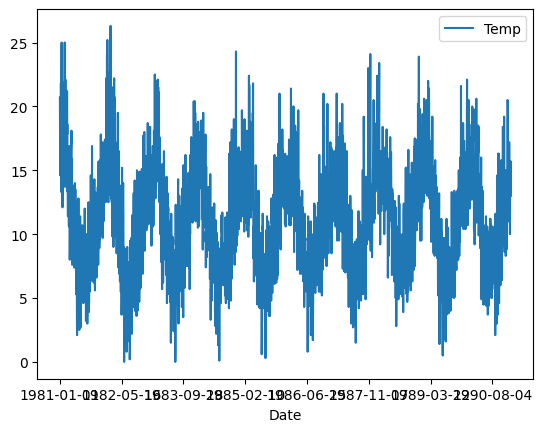

In [ ]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Colab-TimeSeriesBasics/daily-min-temperatures.csv')
df.set_index('Date', inplace=True)
df.plot()
df.head(10)

In [ ]:
perform_adf_test(df)

ADF Statistic: -4.444805
p-value: 0.000247
